In [2]:
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [3]:
df_joined = pd.read_csv('electricity_data/electricity_with_temperature.csv')

In [4]:
df_joined = df_joined.rename(columns={'Unnamed: 0': 'label'})

In [5]:
df_joined.head(1)

,label,datetime,usage,time,month,weekday,year,day,normalized_usage,T_Houston,T_san_antonio,T_dallas
0,0,2019-09-18 23:05:00,51199,23,9,2,2019,18,0.531163,78.0,79.0,85.0


In [6]:
df_joined.tail(1)

,label,datetime,usage,time,month,weekday,year,day,normalized_usage,T_Houston,T_san_antonio,T_dallas
36934,36934,2015-07-01 01:05:00,37456,1,7,2,2015,1,0.255033,71.0,77.0,73.0


In [7]:
df_joined['datetime'] = pd.to_datetime(df_joined['datetime'])

In [8]:
df_2019 = df_joined.loc[(df_joined['datetime'] > date(2018,9,18)) & (df_joined['datetime'] < date(2019,9,18)), ['month', 'usage']]
df_2016 = df_joined.loc[(df_joined['datetime'] > date(2015,7,1)) & (df_joined['datetime'] < date(2016,7,1)), ['month', 'usage']]
df_2019 = df_2019.groupby(['month']).mean().sort_values('month', axis=0)
df_2016 = df_2016.groupby(['month']).mean().sort_values('month', axis=0)

/Users/minjielu/anaconda3/envs/Renaissance/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.
/Users/minjielu/anaconda3/envs/Renaissance/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


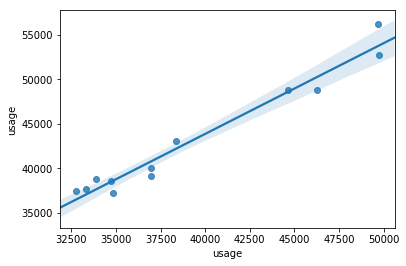

In [9]:
_ = sns.regplot(x=df_2016['usage'], y=df_2019['usage'])

In [10]:
np.savetxt('2016_vs_2019.txt', (df_2016['usage'].values, df_2019['usage'].values))

In [11]:
df_2016['usage'].values

array([36989.66666667, 33876.84913793, 32741.36204576, 34820.06666667,
       38383.67204301, 46280.07916667, 49715.00942127, 49680.00134409,
       44634.23194444, 36962.97177419, 33308.25520111, 34714.01209677])

## Correlation and discrepancy between the three temperatures

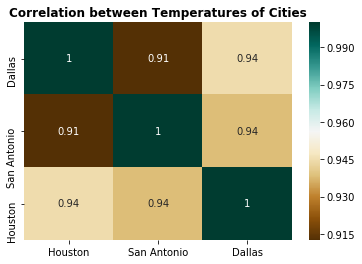

In [12]:
g = sns.heatmap(df_joined[['T_Houston', 'T_san_antonio', 'T_dallas']].corr(),cmap="BrBG",\
                annot=True,xticklabels=['Houston','San Antonio','Dallas'],yticklabels=['Dallas','San Antonio','Houston'])
_ = g.set_title('Correlation between Temperatures of Cities', y=1.05, fontweight='bold')

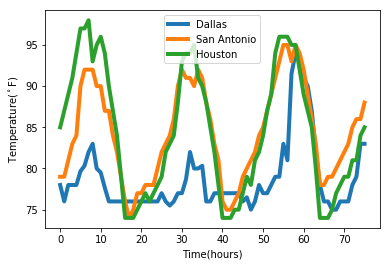

In [21]:
plt.plot(df_joined.loc[:75, 'T_Houston'], linewidth=4)
plt.plot(df_joined.loc[:75, 'T_san_antonio'], linewidth=4)
plt.plot(df_joined.loc[:75, 'T_dallas'], linewidth=4)
plt.xlabel('Time(hours)')
plt.ylabel('Temperature($^\circ$F)')
plt.legend(['Dallas', 'San Antonio', 'Houston'])

In [50]:
st.f_oneway(df_joined['T_Houston'].values, df_joined['T_san_antonio'].values, df_joined['T_dallas'])

F_onewayResult(statistic=250.78050994746803, pvalue=2.153630328749781e-109)